# Import libraries and Dataset
In this step we will be importing and calling all the libraries and datasets.

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
dataset = pd.read_csv('C:\\Users\\HITARTHI MOKASHI\\Downloads\\diabetes.csv')
print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# Step 1: Descriptive Statistics
In this step we will be getting to know all the information related to datasets like nan values,zeros,types of datas and so on.

In [3]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Preview data
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
# Dataset dimensions - (rows, columns)
dataset.shape

(768, 9)

In [6]:
# Statistical summary
dataset.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

# Step 2: Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

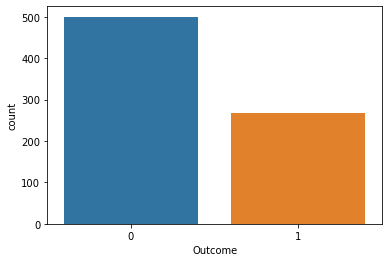

In [7]:
#Countng values of outcomes having 0 or 1, 0 means non diabetic and 1 means diabetic
sns.countplot(x='Outcome',data=dataset)

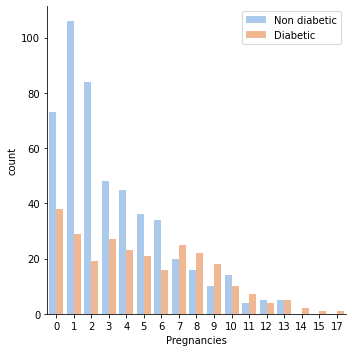

In [8]:
# this graph shows how many pregnant people are affected with diabetic or not.
sns.catplot(x="Pregnancies", kind="count",hue="Outcome",data=dataset, palette="pastel", legend=False)
plt.legend(loc='upper right', labels= ["Non diabetic", "Diabetic"])

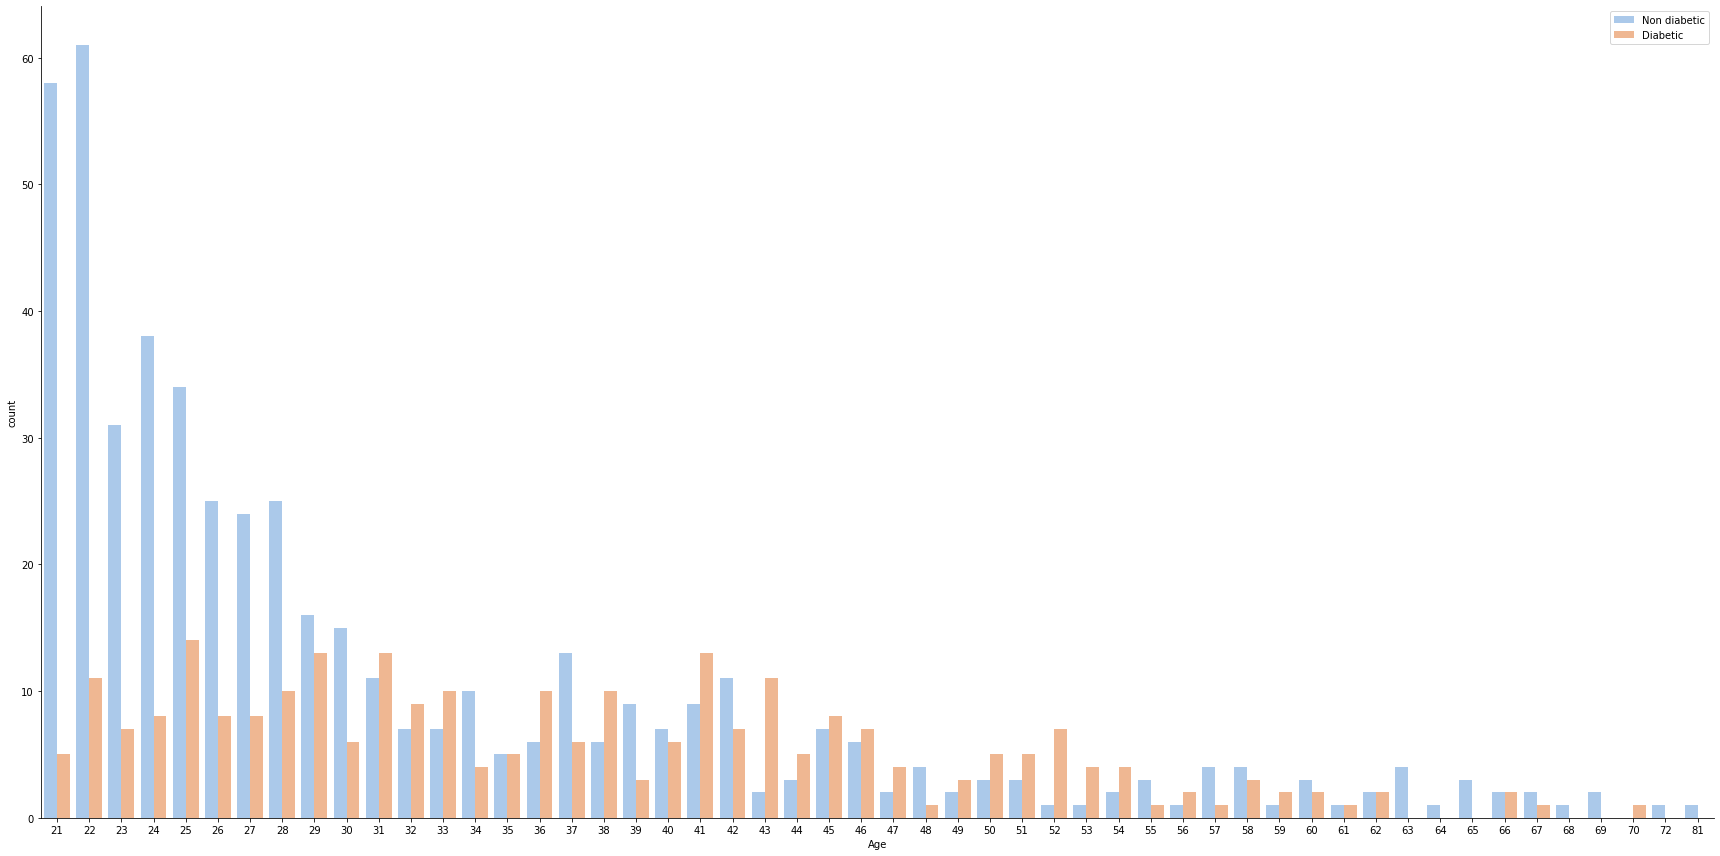

In [9]:
#Below is the graph where it shows the that Older ages are more tend to have diabetes than young age.
sns.catplot(x="Age", kind="count",hue="Outcome",data=dataset, palette="pastel", legend=False,height=12, aspect=2)
plt.legend(loc='upper right', labels= ["Non diabetic", "Diabetic"])

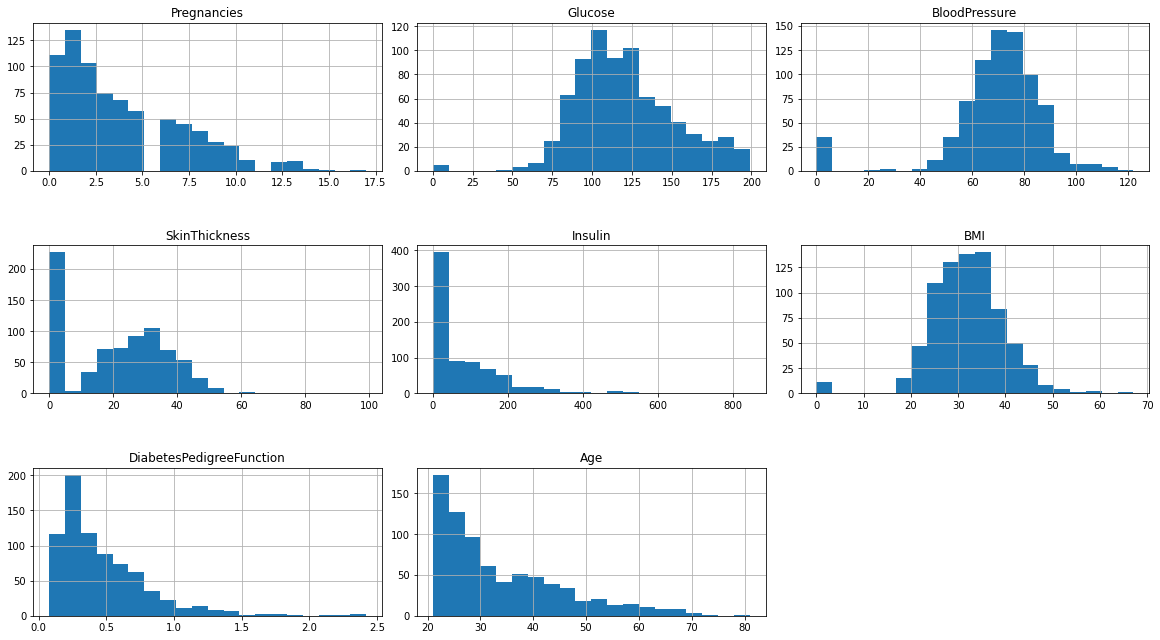

In [10]:
# Histogram of each feature which includes Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin
#BMI,DiabetesPedigreeFunction and Age
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

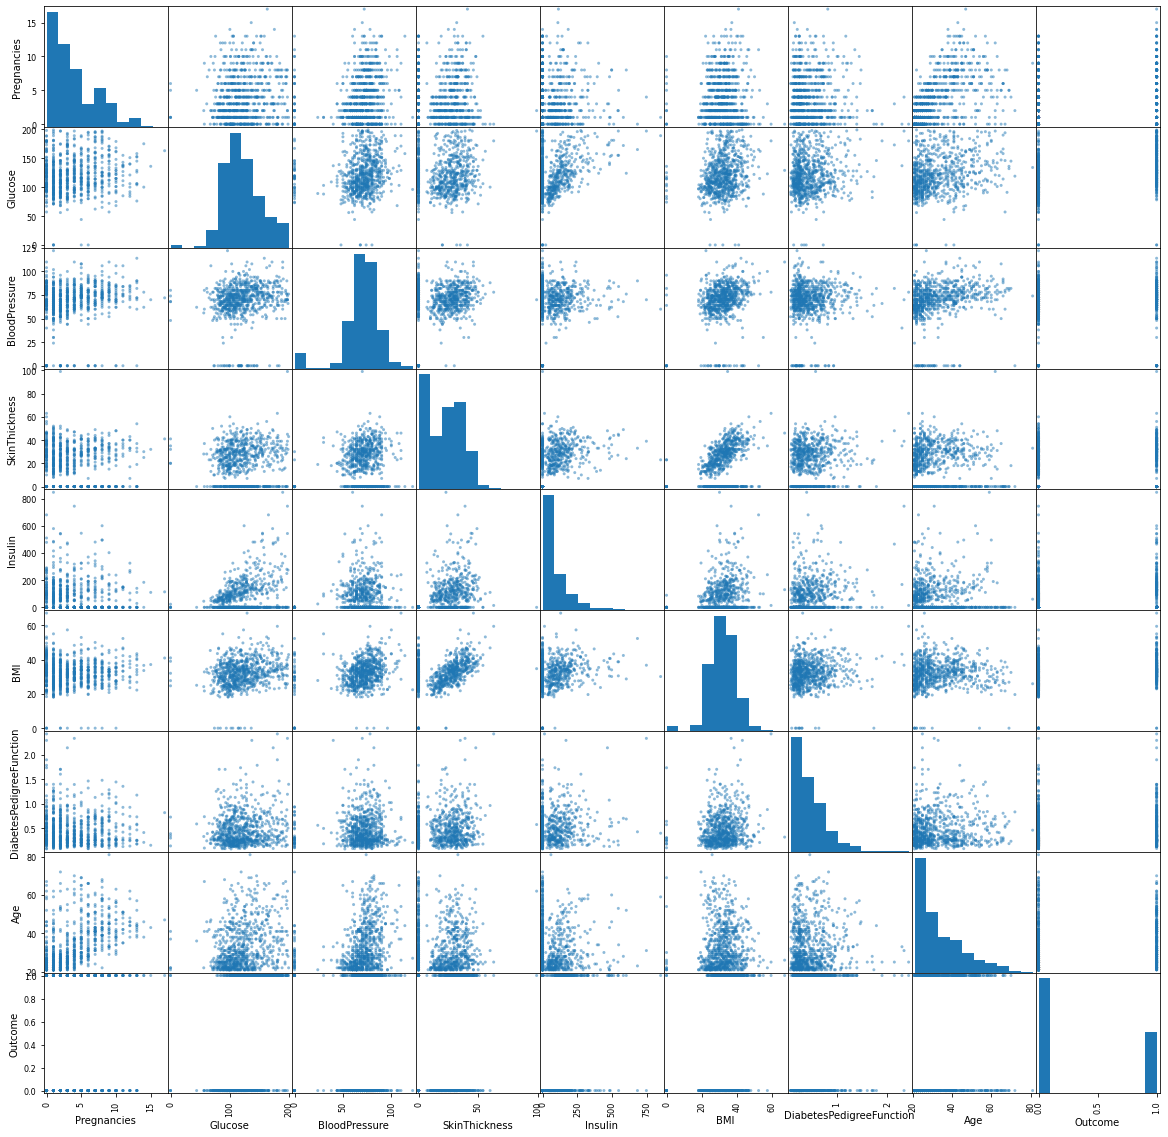

In [11]:
# Scatter plot matrix for all the features 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

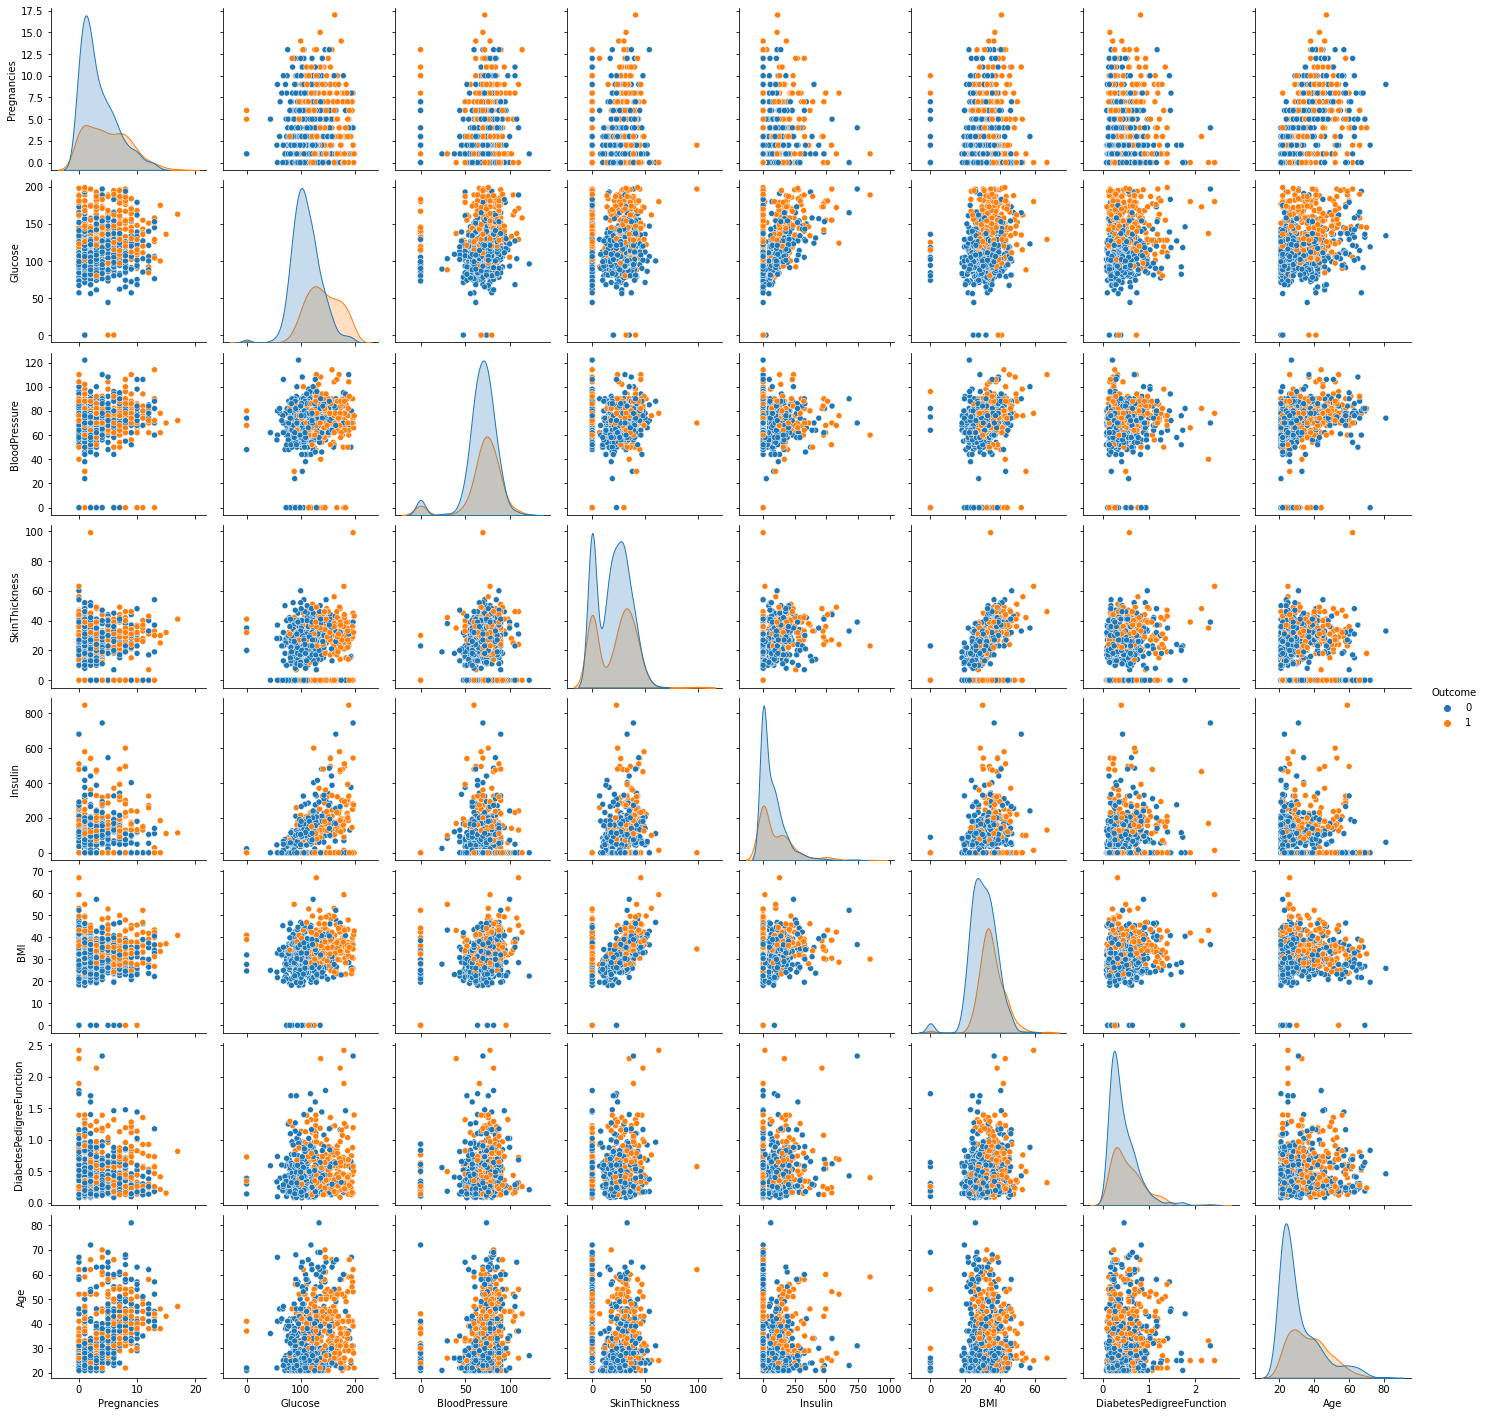

In [12]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

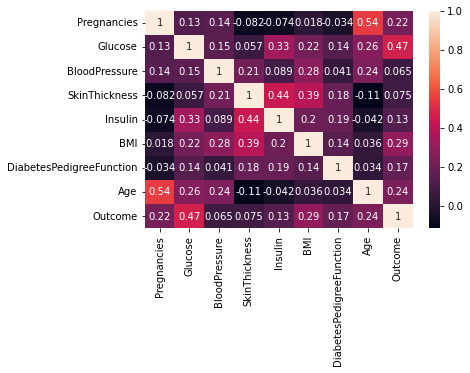

In [13]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

##### Observations:
1) The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
2) From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

# Step 3: Data Preprocessing and Cleaning
This below steps we perform data preprocessing where we find the misssing value,dependency of the missing values, null values, replace all these values to nan and nan values to mean values.Also,we are performing data cleaning too.

In [14]:
# get the total number of missing values from the dataset.
print("Proportion of missing values")
missing_percentage = (dataset==0).sum()*100/dataset.shape[0]
missing_percentage

Proportion of missing values


Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

In [15]:
# let us observe if their is any dependency of missing values in skinfold_thickness and other columns
skinfold_df = dataset.loc[dataset['SkinThickness']==0]
print("Count of zeros in blood_pressure:", (skinfold_df['BloodPressure']==0).sum())
print("Count of zeros in skinfold_thickness:", (skinfold_df['SkinThickness']==0).sum())
print("Count of zeros in insulin:", (skinfold_df['Insulin']==0).sum())

Count of zeros in blood_pressure: 33
Count of zeros in skinfold_thickness: 227
Count of zeros in insulin: 227


In [16]:
# let us observe if their is any dependency of missing values in insulin and other columns
insulin_df = dataset.loc[dataset['Insulin']==0]
print("Count of zeros in blood_pressure:", (insulin_df['BloodPressure']==0).sum())
print("Count of zeros in skinfold_thickness:", (insulin_df['SkinThickness']==0).sum())
print("Count of zeros in insulin:", (insulin_df['Insulin']==0).sum())

Count of zeros in blood_pressure: 35
Count of zeros in skinfold_thickness: 227
Count of zeros in insulin: 374


#### Missing Value
A important point here, zeros in Pregnancies column indicates a feature which could not considered as Missing Value rather zeros present in rest of the columns are to considered as a missing value and hence we will go ahead replacing zeros to Nan.Count of zeros in "blood_pressure" column seems to have dependency on other column like Insulin.Again from the above result we can observe that, missing values in "skinfold_thickness" is correlated/dependent on "insulin" column as missing records are same. Treatment to the Missing values are either by replacing all the nan with mean values.

In [17]:
# Replace the nan values
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
number=1
for column in columns:
    dataset[column]=dataset[column].replace(0,np.nan)
    number+=1
dataset.isnull().sum()/dataset.shape[0]

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [18]:
# Statistical summary
dataset.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   763.0  121.686763   30.535641  44.000  99.00000   
BloodPressure             733.0   72.405184   12.382158  24.000  64.00000   
SkinThickness             541.0   29.153420   10.476982   7.000  22.00000   
Insulin                   394.0  155.548223  118.775855  14.000  76.25000   
BMI                       757.0   32.457464    6.924988  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  141.00000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              29.0000   36.00000   99.00  
Insulin                   125.0000  190.00000  846.00  
BMI                        32.3000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [19]:
# Count of null values
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
# Replacing NaN with mean values
dataset["Glucose"].fillna(dataset["Glucose"].mean(), inplace = True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean(), inplace = True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].mean(), inplace = True)
dataset["Insulin"].fillna(dataset["Insulin"].mean(), inplace = True)
dataset["BMI"].fillna(dataset["BMI"].mean(), inplace = True)

In [21]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_processed = sc.fit_transform(dataset)

In [22]:
dataset_processed = pd.DataFrame(dataset_processed)

In [23]:
# Feature matrix - Taking all our independent columns into single array and dependent values into another array
x=dataset_processed.iloc[:,:-1].values  #Independent matrix
y=dataset_processed.iloc[:,-1].values

In [24]:
# getting the shape of the x.
x.shape

(768, 8)

In [25]:
x[0] #refering to column 1 in dataset i.e pregnancies

array([0.35294118, 0.67096774, 0.48979592, 0.30434783, 0.17013008,
       0.31492843, 0.23441503, 0.48333333])

In [26]:
# print all the values of the y and we are converting the float values to int values
y
Y = y.astype(int)
print(Y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

# Step 4: Exploratory Data Analysis
Checking which columns are useful or not

Text(0.5, 1.0, 'Glucose')

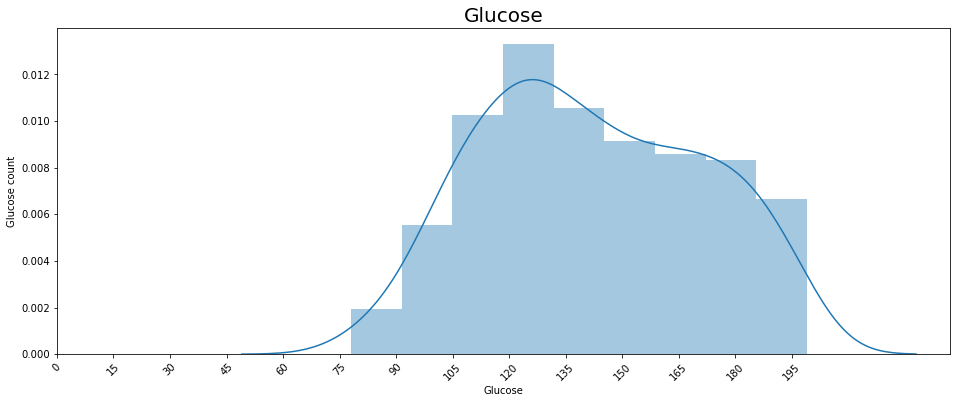

In [27]:
# glucose for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(dataset["Glucose"][dataset["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

Text(0.5, 1.0, 'Insulin')

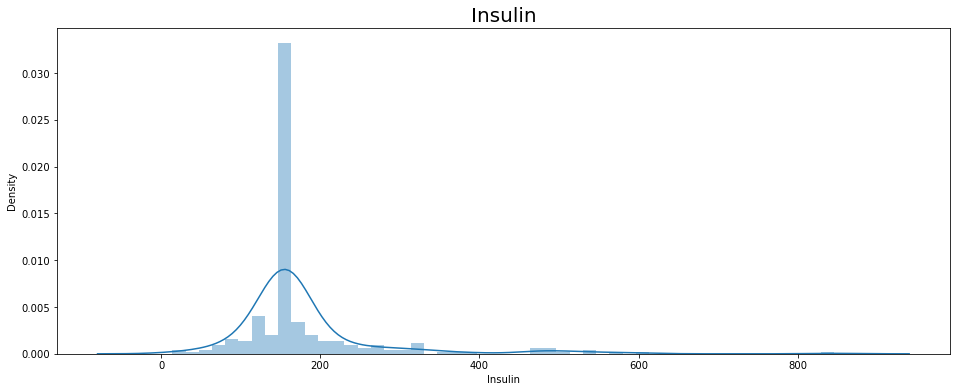

In [28]:
# insulin for diabetic 

fig = plt.figure(figsize = (16,6))

sns.distplot(dataset["Insulin"][dataset["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

Text(0.5, 1.0, 'BMI')

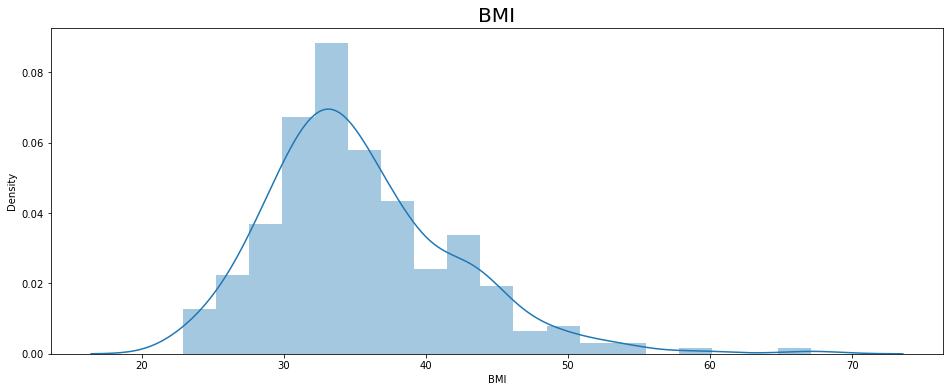

In [29]:
# BMI for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(dataset["BMI"][dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

Text(0.5, 1.0, 'diabetespedigreefunction')

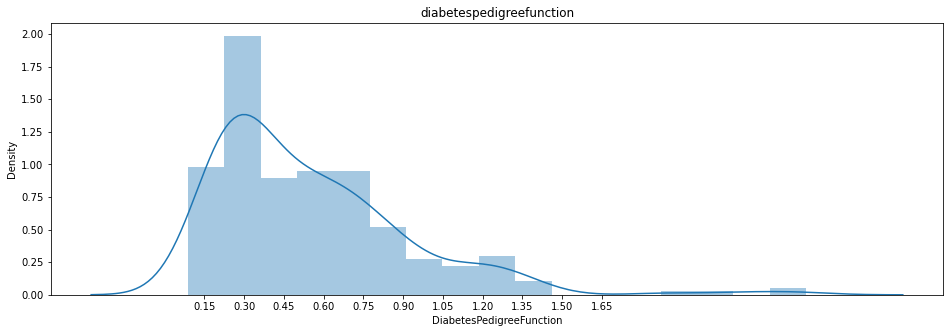

In [30]:
# diabeticpedigreefunction for diabetic
fig = plt.figure(figsize = (16,5))
sns.distplot(dataset["DiabetesPedigreeFunction"][dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

Text(0.5, 1.0, 'Age')

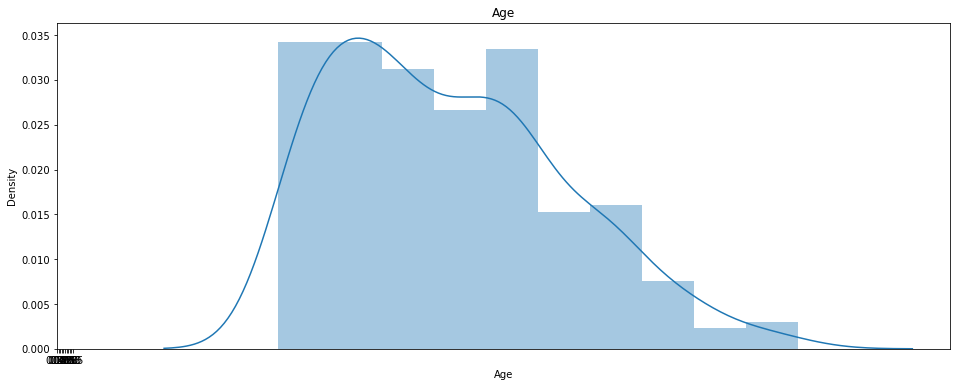

In [31]:
# Age for diabetic
fig = plt.figure(figsize = (16,6))

sns.distplot(dataset["Age"][dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

In [32]:
# splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#test_size 0.2 means for testing data 20% and training data 80%

In [33]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (614, 8)
x_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


# Step 5: Data Modelling
In this step we have tried multiple models like linear regression, random forest, KNN, Logistic Regression,Support Vector Classifier,Naive Bayes,Decision tree. Out of these algorithms we have finalized the Logistic Regression because it gave us the highest accuracy.

In [34]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logregression = LogisticRegression(random_state = 42)
logregression.fit(x_train, y_train)
y_pred = logregression.predict(x_test)

In [35]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(x_train, y_train)


y_pred_dectree = dectree.predict(x_test)

In [36]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)


In [37]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

# Step 6: Model Evaluation

In [38]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logregression = accuracy_score(y_test, y_pred)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_dectree = accuracy_score(y_test, y_pred_dectree)

In [39]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logregression * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))


Logistic Regression: 81.16883116883116
Support Vector Classifier: 79.87012987012987
Naive Bayes: 78.57142857142857
Decision tree: 73.37662337662337


<AxesSubplot:>

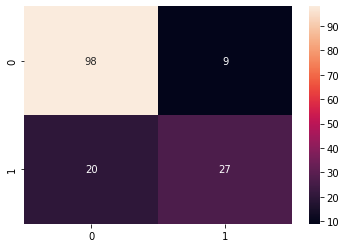

In [40]:
# Confusion matrix - To check how many are correct or wrong for XG Boost algorithm
from sklearn.metrics import confusion_matrix
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, annot=True)

##### The above heatmap says 0,0 means true negative and 1,1 means true positive 
##### and 0,1 means even person is negative but showing result positive
##### and 1,0 means person is positive but shows negative.

In [41]:
# Classification report for Logistic Regression algorithm
from sklearn.metrics import classification_report,roc_curve, auc, roc_auc_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       107
         1.0       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154



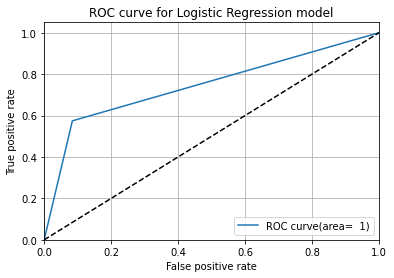

In [42]:
# ROC graph for Logistic Regression model
fpr,tpr,_=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Logistic Regression model')
plt.legend(loc='lower right')
plt.grid()
plt.show()